In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import datetime

In [2]:
pwd

'C:\\Users\\MAVERICK\\OneDrive\\Desktop\\New folder\\Lognormal.io'

### 1- Load the Data in the file - "assignment_python.csv" given to you as a .csv using Pandas

In [3]:
df1=pd.read_csv('assignment_python.csv')


### 2- Understand the data using the columns given (metadata descriptions below)

In [4]:
df=df1.copy(deep=True)

In [5]:
df

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29
...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31


In [6]:
df.describe()

,IDCUSTOMER,FIRST_DEPOSIT_AMOUNT
count,2.206500e+04,22065.000000
mean,1.380593e+08,284.806530
std,3.272693e+07,943.993064
min,5.075649e+06,0.380000
25%,1.459097e+08,70.000000
50%,1.465139e+08,100.000000
75%,1.471483e+08,250.000000
max,1.478480e+08,100000.000000


#### Observation: There are a lot of outliers in FIRST_DEPOSIT_AMOUNT column since the Max value is 100000 and at 75% its only 250

In [7]:
df['COUNTRY'].unique()

array(['Turkey'], dtype=object)

#### Observation: there is only one Country as "Turkey"

.

In [8]:
len(df['CITY'].value_counts())

331

#### *We can observe that there are lot of unique variables in CITY column so we have to check for any duplicates or same city features to combine into one.*

In [9]:
# Lowering the case
df['CITY'] = df['CITY'].map(lambda x: x.lower())

string.punctuation

# remove punctuation
df['CITY'] = df['CITY'].map(lambda x: re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', "", x)) 
df['CITY'].head()

0     ankara
1     elazığ
2      izmir
3    üsküdar
4    sakarya
Name: CITY, dtype: object

In [10]:
# Referred Google to get the actual City Names from "Turkey" and replacing all the unwanted,duplicate to its respective city variable.

df['CITY']=df['CITY'].replace(dict.fromkeys(['i̇zmi̇r  foça', 'i̇zmir konak', 'i̇zmir', 'i̇zmi̇r',
       'kemalpasa  i̇zmir', 'seferihisar i̇zmir', 'i̇zmi̇rkarşıyaka',
       'i̇zmir buca','izmir', 'izmir menemen', 'izmirkonak', 'izmirbornova',
       'izmir  buca', 'izmir bornova', 'izmir tire'], 'izmir'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['ankara', 'si̇ncanankara', 'ankaraaltındağ', 'keçiören  ankara',
       'ankara mamak', 'ankara  yenimahalle', 'pursaklarankara',
       'ankara ', 'güneş apt blok no22 i̇ç kapı no8 çankaya ankara',
       'çankayaankara',
       'güneş apt blok no 22 iç kapı no 8 ankara çankaya',
       'altındağ ankara', 'ankaraçankaya', 'yenimahalle ankara',
       'ankara yeni mahalle'], 'ankara'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['istanbul kadiköy', 'istanbul fatih', 'istanbul',
       'istanbul maltepe', 'beşiktaşistanbul', 'istanbul  zeytinburnu',
       'istanbul kartal', 'sisli  istanbul', 'istanbukküçükçekmece',
       'istanbu', 'istanbul buyukcekmece', 'istanbul bahçelievler',
       'buyukcekmece istanbul', 'istanbulbeykoz', 'istanbul\\üsküdar',
       'istanbulsarıyer', 'esenyurt istanbul', 'istanbulkağıthane',
       'istanbulzeytinburnu', 'istanbul gaziosmanpasa', 'istanbultuzla',
       'ataşehir istanbul', 'kağıthane istanbul', 'beykoz istanbul','i̇stanbul', 'başakşehi̇ri̇stanbul', 'i̇stanbulsultangazi',
       'i̇stanbuleyüp', 'i̇stanbulbahçelievler', 'avcılari̇stanbul',
       'fatihi̇stanbul', 'beykoz  i̇stanbul', 'üsküdari̇stanbul',
       'maltepe  i̇stanbul', 'sarıyer i̇stanbul', 'atasehir i̇stanbul',
       'i̇ç kapı no 7 sancaktepei̇stanbul'], 'istanbul'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['sakarya', 'sakarya akyazi', 'karasusakarya'], 'sakarya'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['merkez', 'manisa merkez', 'gümüşhanemerkez', 'bilecikmerkez',
       'merkezkütahya', 'merkezedirne', 'denizlimerkez', 'bartın merkez',
       'gi̇resun merkez', 'merkez  şırnak', 'batman merkez'], 'merkez'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['kayseri', 'mimsin kayseri', 'kocasinankayseri'], 'Kayseri'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['orduünye', 'ordufatsa', 'ordu', 'perşembe ordu'], 'ordu'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['bursa', 'bursa iznik yesılcami mh karaca skk', 'bursa karacabey',
       'bursani̇lüfer'], 'bursa'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['konya', 'konya selcuklu', 'konyaselçuklu', 'konyailgin',
       'konya emirgazi'], 'konya'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['hatay antakya', 'hatay', 'hatayantakya'], 'hatay'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['samsun', 'samsunbafra', 'i̇lkadimsamsun'], 'samsun'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['kumluca', 'antalya kumluca'], 'kumluca'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['tekirdağ çorlu', 'çorlu tekirdağ', 'muratlitekirdag', 'tekirdağ',
       'tekirdağ ', 'tekirdağ\\ çorlu'], 'tekirdağ'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['burdur', 'yeşi̇lova  burdur'], 'burdur'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['yenişehir', 'yenişehirmersi̇n', 'diyarbakır yenişehir',
       'yenişehirdbakır', 'yenişehirmersin'], 'yenişehir'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['adanaçukurova', 'adana', 'seyhanadana', 'kozanadana',
       'sarıçamadana'], 'adana'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['şırnak cizre', 'şırnak'], 'şırnak'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['balıkesir', 'balikesi̇r', 'balıkesirbandırma', 'balıkkesir'], 'balikesi̇r'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['edi̇rne', 'edirne keşan', 'edirne'], 'edirne'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['diyarbakır', 'diyarbakır  bağlar', 'diyarbakırbağlar',
       'diyarbakır silvan', 'diyarbakir', 'bağlardiyarbakır',
       'kulp diyarbakir'], 'diyarbakir'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['gebze', 'gebze kocaeli̇'], 'gebze'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['antalya', 'laraantalya', 'antalyamuratpaşa', 'muratpaşaantalya',
       'antakya', 'kaşantalya', 'seri̇k antalya', 'alanya antalya',
       'kepez antalya'], 'antalya'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['batman', 'gerçüşbatman'], 'gerçüş'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['zeytinburnu', 'zeytinburnui̇st', 'zeytinburnu '], 'zeytinburnu'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['malatyatemelli', 'malatya'], 'malatya'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['didimaydın', 'aydınnazilli', 'aydın', 'germencikaydın','nazilli'], 'aydın'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['bilecikbozüyük', 'bilecik', 'gölpazarıbilecik'], 'bilecik'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['kmaraş elbistan', 'elbistan'], 'elbistan'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['gaziantep   şehitkamil', 'gaziantep'], 'gaziantep'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['afyon', 'afyonkarahisar'], 'afyonkarahisar'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['kocaeli', 'kocaeliizmit', 'kocaeli izmit', 'kocaeliderince',
       'kocaeli golcuk'], 'kocaeli'))
df['CITY']=df['CITY'].replace(dict.fromkeys(['sinopgerze', 'sinop'], 'sinopgerze'))
df['CITY']=df['CITY'].replace(dict.fromkeys([' ','1212', 'jdhsısus', 'sdasd', 'srfdgfdgdf', 'dfagdfgadgaddfg'], 'others'))

In [11]:
df['CITY'].value_counts()

istanbul             4827
bursa                1656
diyarbakir           1315
ankara               1210
izmir                1171
                     ... 
erzurum yakutiye        1
çubuk                   1
tarsus                  1
yalvac                  1
di̇yarbakir             1
Name: CITY, Length: 139, dtype: int64

#### *Observation: Many Unique city contains its own District in the CITY column which we will have it unchanged.*



.

In [12]:
# Checking Unique values in GENDER column
df.GENDER.unique()

array(['M', 'F', 'M  '], dtype=object)

#### *Observation: Gender column contains some duplicate unique value same as "M" .So,better to replace it.*

In [13]:
df['GENDER']=df['GENDER'].replace(dict.fromkeys(['M  ','M'],'M'))

### Creating a Copy of the Clean data as "data"

In [14]:
data=df.copy(deep=True)
data

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02
3,5300998,M,üsküdar,Turkey,100.0,2009-05-02,2022-02-11
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29
...,...,...,...,...,...,...,...
22060,147844121,M,istanbul,Turkey,50.0,2022-08-31,2022-08-31
22061,147844491,M,eskişehir,Turkey,50.0,2022-08-31,2022-08-31
22062,147846481,M,van,Turkey,100.0,2022-08-31,2022-08-31
22063,147843561,M,antalya,Turkey,200.0,2022-08-31,2022-08-31


In [15]:
data_cat=data.select_dtypes(include='object')
data_cat.describe()

,GENDER,CITY,COUNTRY,REGISTRATION_DATE,DEPOSIT_DATE
count,22065,22065,22065,22065,22065
unique,2,139,1,1417,243
top,M,istanbul,Turkey,2022-03-22,2022-04-26
freq,21986,4827,22065,148,169


In [16]:
data[['DEPOSIT_DATE','REGISTRATION_DATE']] = data[['DEPOSIT_DATE','REGISTRATION_DATE']].apply(pd.to_datetime)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22065 entries, 0 to 22064
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   IDCUSTOMER            22065 non-null  int64         
 1   GENDER                22065 non-null  object        
 2   CITY                  22065 non-null  object        
 3   COUNTRY               22065 non-null  object        
 4   FIRST_DEPOSIT_AMOUNT  22065 non-null  float64       
 5   REGISTRATION_DATE     22065 non-null  datetime64[ns]
 6   DEPOSIT_DATE          22065 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 1.2+ MB


In [17]:
# Checking for Nulls 
data.isnull().sum()

IDCUSTOMER              0
GENDER                  0
CITY                    0
COUNTRY                 0
FIRST_DEPOSIT_AMOUNT    0
REGISTRATION_DATE       0
DEPOSIT_DATE            0
dtype: int64

In [18]:
data.GENDER.value_counts()

M    21986
F       79
Name: GENDER, dtype: int64

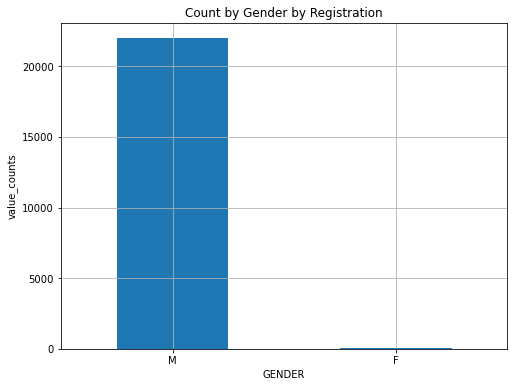

In [19]:
data.GENDER.value_counts().plot.bar(figsize=(8,6),title='Count by Gender by Registration')
plt.xlabel('GENDER')
plt.ylabel('value_counts')
plt.xticks(rotation=0)
plt.grid()

#### *Observation: We can Notice one thing very important that very few  females have registered.*

<AxesSubplot:>

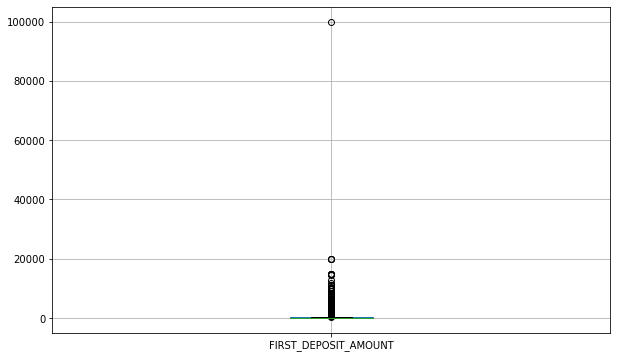

In [20]:
plt.figure(figsize=(10,6))
data.boxplot(column='FIRST_DEPOSIT_AMOUNT')

#### *Observation: from the above Boxplot we can understand that there are a lot of outliers in the FIRST_DEPOSIT_AMOUNT columns which should not be treated beacuse we might loose alot of rows.*

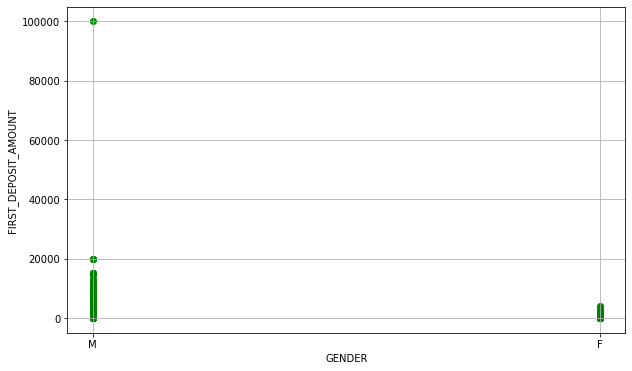

In [21]:
## To check the data Distribution in 'FIRST_DEPOSIT_AMOUNT' with respect to 'GENDER' using Scatter Plot.
plt.figure(figsize=(10,6))
plt.scatter(x='GENDER',y='FIRST_DEPOSIT_AMOUNT',data=data,color="green")
plt.xlabel('GENDER')
plt.ylabel('FIRST_DEPOSIT_AMOUNT')
plt.grid()
plt.show()

#### *Observation: From the above plot we can understand that 'Male' have done a large amount of 1st Deposition compared to 'Females' .*

### 3 - Calculate the time period in days for which the customer was active (days from first deposit date) and enter the value in a new column titled 'Customer Lifetime' & what is the lifetime in days for customer ID - 5371454

In [22]:
data['Customer Lifetime'] = datetime.date.today()-data.DEPOSIT_DATE.dt.date
data.head()

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,Customer Lifetime
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,142 days
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,256 days
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,176 days
3,5300998,M,üsküdar,Turkey,100.0,2009-05-02,2022-02-11,256 days
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,149 days


In [23]:
data.columns

Index(['IDCUSTOMER', 'GENDER', 'CITY', 'COUNTRY', 'FIRST_DEPOSIT_AMOUNT',
       'REGISTRATION_DATE', 'DEPOSIT_DATE', 'Customer Lifetime'],
      dtype='object')

In [24]:
data[data['IDCUSTOMER']==5371454]['Customer Lifetime']

4   149 days
Name: Customer Lifetime, dtype: timedelta64[ns]

#### *Conclusion : the Lifetime in days for Customer ID 5371454 is " 145 " days *
#### (Note: the number of days will increase on the day of execution of this file by the user ).

### 4 - Find the city & country with the highest number of unique customers

In [25]:
df_cou_city_count = data.groupby(['COUNTRY','CITY'])['IDCUSTOMER'].size()
df_cou_city_count[df_cou_city_count == df_cou_city_count.max()]

COUNTRY  CITY    
Turkey   istanbul    4827
Name: IDCUSTOMER, dtype: int64

####  *Conclusion : The city & country with the highest number of unique customers is city: " İstanbul " & Country: " Turkey ".*

### 5- Find the unique count of players in each country (in descending order) & specify the number of unique players from the city - Kayseri

In [26]:
# Unique count of players in each country (in descending order)

data.groupby(['COUNTRY'])['IDCUSTOMER'].size().sort_values(ascending= False)

COUNTRY
Turkey    22065
Name: IDCUSTOMER, dtype: int64

In [27]:
len(data.loc[data['CITY']=='Kayseri', 'IDCUSTOMER'].unique())

372

#### *Conclusion: The unique count of players in country "Turkey" is "22065" Since,only one Unique Country is present in the dataset i.e, 'Turkey' & The Number of unique players in the city " Kayseri " is " 372 ".*
 

#### But if the question would have been like the unique count of players in each City (in descending order) then the solution is 

In [28]:
data.groupby(['CITY'])['IDCUSTOMER'].size().sort_values(ascending= False)

CITY
istanbul      4827
bursa         1656
diyarbakir    1315
ankara        1210
izmir         1171
              ... 
pendi̇k          1
başakşehir       1
bayraklı         1
sanliurfa        1
fethiyr          1
Name: IDCUSTOMER, Length: 139, dtype: int64

### OR

In [29]:
data['CITY'].value_counts(ascending=False)

istanbul             4827
bursa                1656
diyarbakir           1315
ankara               1210
izmir                1171
                     ... 
erzurum yakutiye        1
çubuk                   1
tarsus                  1
yalvac                  1
di̇yarbakir             1
Name: CITY, Length: 139, dtype: int64

### 6- Which city gives the third highest average first_deposit_amount and what is the average amount?

In [56]:
new=data.pivot_table(index='CITY',values='FIRST_DEPOSIT_AMOUNT',aggfunc=np.mean)
new.rename({'FIRST_DEPOSIT_AMOUNT':'AVG FIRST_DEPOSIT_AMOUNT'},axis='columns',inplace=True)

new.reset_index(inplace=True)
new.sort_values(by='AVG FIRST_DEPOSIT_AMOUNT',ascending=False)

,CITY,AVG FIRST_DEPOSIT_AMOUNT
22,başakşehir,2000.0
113,tepebaşıeskişehir,1500.0
115,tokatturhal,1500.0
56,gölbaşi,1000.0
28,buca,1000.0
...,...,...
49,fethiyemugla,50.0
47,eskısehır,50.0
123,vezirkoprü,50.0
111,tarsus,50.0


In [31]:
new.nlargest(3,'AVG FIRST_DEPOSIT_AMOUNT',keep='all').iloc[-1]

CITY                        tokatturhal
AVG FIRST_DEPOSIT_AMOUNT         1500.0
Name: 115, dtype: object

#### *Conclusion: "sarıçam/Adana" city gives the 3rd Highest average first_deposit_amount of " 9000 ".*

### 7- Plot a graph showing the city and the descending unique count of the unique customers (upto the top 40 cities by the unique count) and make a large plot (clearly visible) and make sure the title and labels are clearly visible.

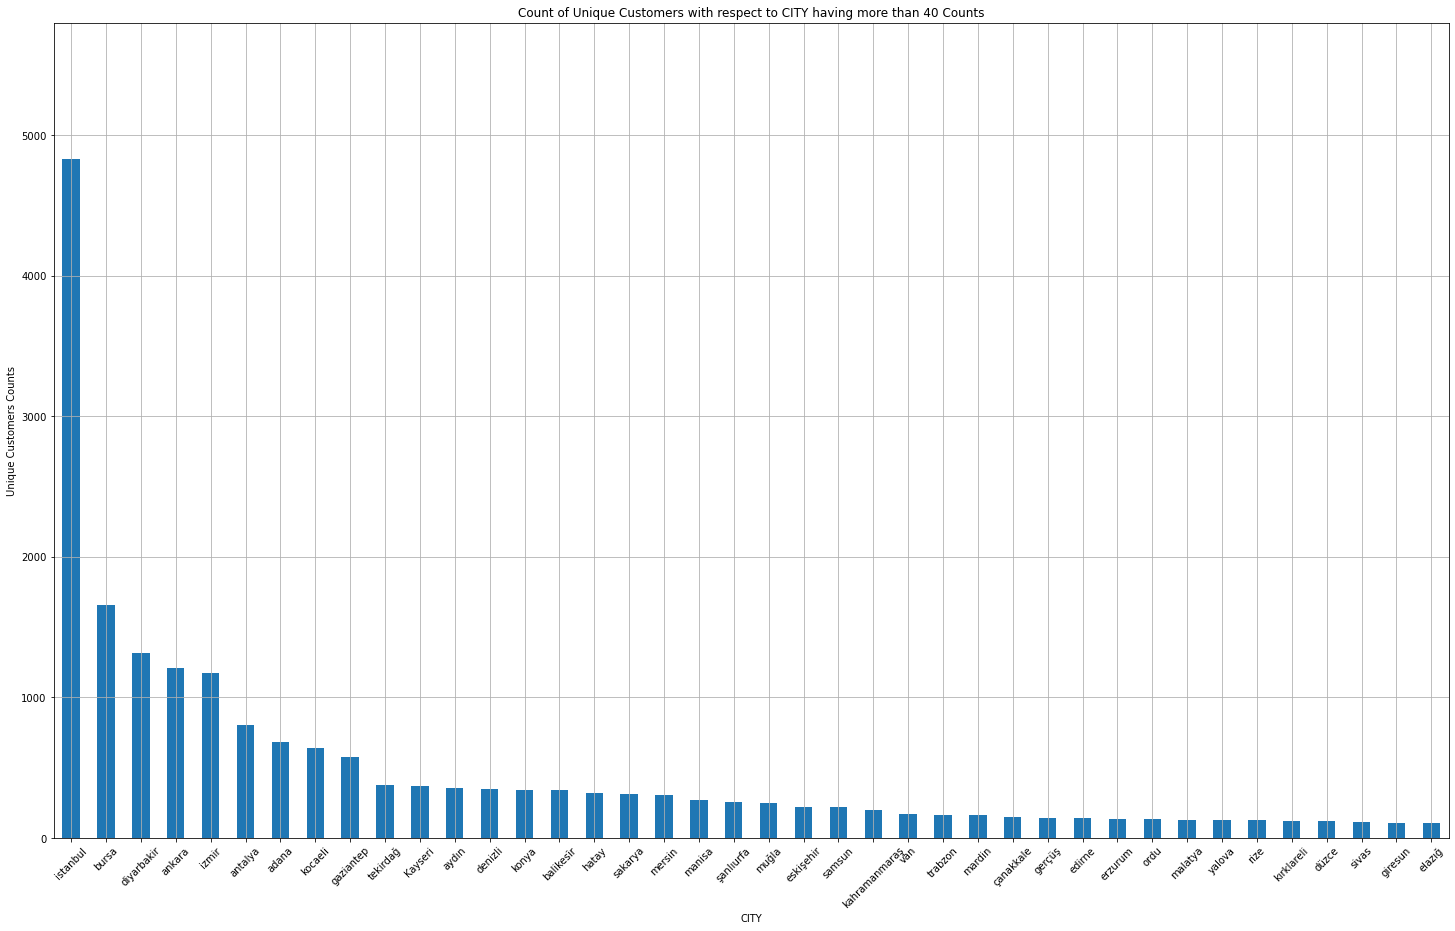

In [32]:
### Count of Unique Customers with respect 'CITY'
plt.figure(figsize = (25,15))
data.groupby(['CITY'])['IDCUSTOMER'].size().sort_values(ascending= False).head(40).plot(kind='bar')
plt.xlabel('CITY')
plt.xticks(rotation = 45)
plt.ylim(0,5800)
plt.ylabel('Unique Customers Counts')
plt.title('Count of Unique Customers with respect to CITY having more than 40 Counts')
plt.grid()

#### *Observation: The city "Istanbul" is the only city with more than 4000 Unique customer which means most of the customer from the Country "Turkey"  have Done their "Registration" in this City Compare to others.*

### 8 - Plot the conversion for each month of the data (Conversion % = No. of unique First Deposits in the month / No. of unique Registrations in the month) Here, the conversion percentage should be reflected in red, and the labels in the X-axis should be year & month out of the Deposit Dates.

In [33]:
# No. of unique First Deposits in the month
Deposit_date=data['DEPOSIT_DATE'].dt.to_period('M').value_counts()
df_dep_date=pd.DataFrame(Deposit_date)

df_dep_date.head()

,DEPOSIT_DATE
2022-03,3790
2022-04,3386
2022-02,3202
2022-05,2983
2022-01,2555


In [34]:
# No. of unique Registrations in the month
REGISTRATION_DATE=data['REGISTRATION_DATE'].dt.to_period('M').value_counts()
df_reg_cnt = pd.DataFrame(REGISTRATION_DATE)
df_reg_cnt.head()

,REGISTRATION_DATE
2022-03,3350
2022-02,2924
2022-04,2921
2022-05,2607
2022-01,2420


In [35]:
df_reg_ct = df_reg_cnt.join(df_dep_date)
df_reg_ct['Conversion %'] = (df_reg_ct.DEPOSIT_DATE / df_reg_ct.REGISTRATION_DATE).mul(100).round(2)
df_reg_ct

,REGISTRATION_DATE,DEPOSIT_DATE,Conversion %
2022-03,3350,3790.0,113.13
2022-02,2924,3202.0,109.51
2022-04,2921,3386.0,115.92
2022-05,2607,2983.0,114.42
2022-01,2420,2555.0,105.58
...,...,...,...
2012-10,1,NaN,NaN
2013-04,1,NaN,NaN
2013-05,1,NaN,NaN
2013-06,1,NaN,NaN


In [36]:
df_reg_ct=df_reg_ct.reset_index()

df_reg_ct.rename({'REGISTRATION_DATE':'Unique_Counts_Reg','index':'DATE','DEPOSIT_DATE':'Unique_Counts_Dep'},axis='columns',inplace=True)
df_reg_ct

,DATE,Unique_Counts_Reg,Unique_Counts_Dep,Conversion %
0,2022-03,3350,3790.0,113.13
1,2022-02,2924,3202.0,109.51
2,2022-04,2921,3386.0,115.92
3,2022-05,2607,2983.0,114.42
4,2022-01,2420,2555.0,105.58
...,...,...,...,...
147,2012-10,1,NaN,NaN
148,2013-04,1,NaN,NaN
149,2013-05,1,NaN,NaN
150,2013-06,1,NaN,NaN


In [37]:
df_reg_ct[df_reg_ct['Conversion %'] > 0].count()

DATE                 8
Unique_Counts_Reg    8
Unique_Counts_Dep    8
Conversion %         8
dtype: int64

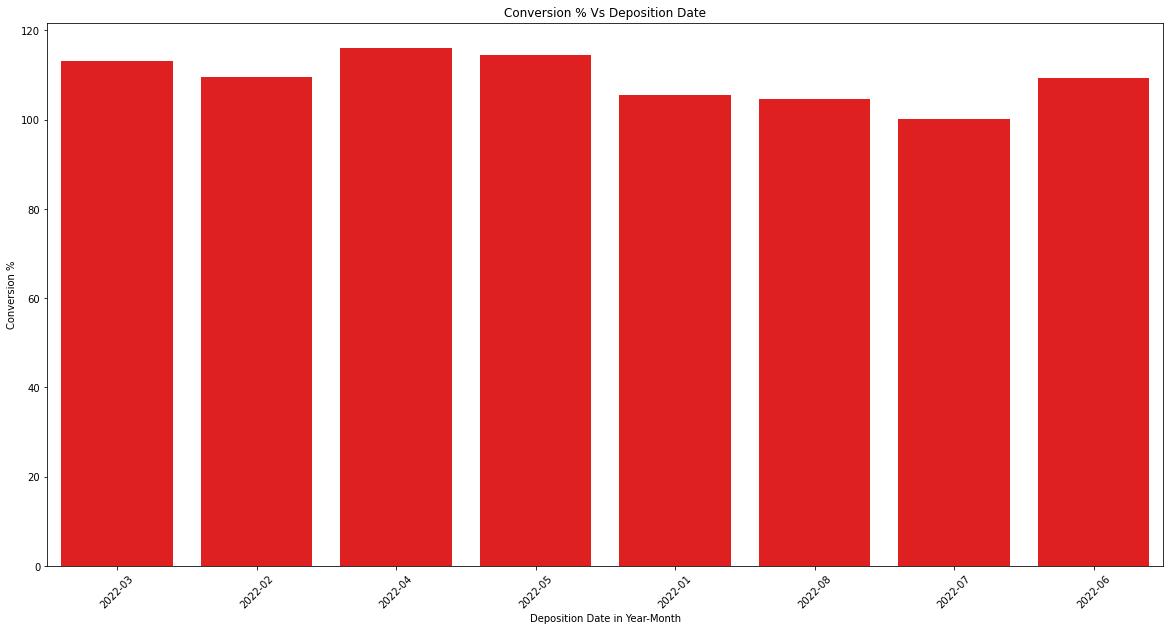

In [38]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_reg_ct[df_reg_ct['Conversion %'] > 0]['DATE'].values, y='Conversion %', data=df_reg_ct[df_reg_ct['Conversion %'] > 0],color='r')
plt.xlabel('Deposition Date in Year-Month')
plt.title('Conversion % Vs Deposition Date')
plt.xticks(rotation = 45)
plt.show()

#### *Observation: As we can observe one most important thing from the data i.e,the customer who have registered before 2022 have done their 1st deposition only in the year 2022 that means all the depostion is done only in 2022,So even if we are calculating the Conversion % we will get the conversion rate above 100%.* 

### 9- What was the conversion rate in June 2022, limit the answer to 2 decimal places. (in %)

In [39]:
df_reg_ct.head()

,DATE,Unique_Counts_Reg,Unique_Counts_Dep,Conversion %
0,2022-03,3350,3790.0,113.13
1,2022-02,2924,3202.0,109.51
2,2022-04,2921,3386.0,115.92
3,2022-05,2607,2983.0,114.42
4,2022-01,2420,2555.0,105.58


In [40]:
df_reg_ct[df_reg_ct['DATE']=='2022-07']

,DATE,Unique_Counts_Reg,Unique_Counts_Dep,Conversion %
6,2022-07,1840,1842.0,100.11


#### *Conclusion: The Conversion % in 2022 June is " 100.11 " which is higher because Customer who registered before 2022 are doing their 1st deposition in the year of 2022.*

### 10. Make a copy of the original data in the file assignment_python as a pandas dataframe called 'df_ft' and generate the following columns:
     1. week of day column from the deposit date column
     2. descriptive statistics of the table
     3. make a column with the first_deposit_amounts binned in bins of 500 and reflected against every customer ID (for example, someone with a first deposit amount of 880 should reflect in the binning column as '500-1000'.

#### 1. week of day column from the deposit date column

In [41]:
df_ft=df1.copy(deep=True)
df_ft

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29
...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31


In [42]:
df_ft[['DEPOSIT_DATE','REGISTRATION_DATE']] = df_ft[['DEPOSIT_DATE','REGISTRATION_DATE']].apply(pd.to_datetime)
df_ft['Week_of_day']=df_ft['DEPOSIT_DATE'].dt.day_name()
df_ft

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,Week_of_day
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,Sunday
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,Friday
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,Monday
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,Friday
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,Sunday
...,...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31,Wednesday
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31,Wednesday
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31,Wednesday
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31,Wednesday


In [43]:
df_ft['CITY'].value_counts()

İstanbul            4770
Bursa               1652
Diyarbakır          1307
Ankara              1182
İzmir               1151
                    ... 
çorlu tekirdağ         1
istanbul/sarıyer       1
ksk                    1
edirne keşan           1
Batman Merkez          1
Name: CITY, Length: 331, dtype: int64

#### 2. descriptive statistics of the table

In [44]:
df_ft.describe()

,IDCUSTOMER,FIRST_DEPOSIT_AMOUNT
count,2.206500e+04,22065.000000
mean,1.380593e+08,284.806530
std,3.272693e+07,943.993064
min,5.075649e+06,0.380000
25%,1.459097e+08,70.000000
50%,1.465139e+08,100.000000
75%,1.471483e+08,250.000000
max,1.478480e+08,100000.000000


In [45]:
df_ft_cat=df_ft.select_dtypes(include='object')

In [46]:
# Checking the  descriptive statistics for categorical columns
df_ft_cat.describe()

,GENDER,CITY,COUNTRY,Week_of_day
count,22065,22065,22065,22065
unique,3,331,1,7
top,M,İstanbul,Turkey,Saturday
freq,21985,4770,22065,3337


In [47]:
# Observation: In Gender Column there in total 2 genders including 'Male','Female'and dupicate

#### 3- make a column with the first_deposit_amounts binned in bins of 500 and reflected against every customer ID (for example, someone with a first deposit amount of 880 should reflect in the binning column as '500-1000'.

In [48]:
df_ft['BINNED_FIRST_DEPOSIT_AMOUNT']=pd.cut(df_ft.FIRST_DEPOSIT_AMOUNT,bins=[0,500,1000,100001],
                      labels=['0-500','500-1000','1000 & above'])

In [49]:
df_ft.head(5)

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,Week_of_day,BINNED_FIRST_DEPOSIT_AMOUNT
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,Sunday,0-500
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,Friday,0-500
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,Monday,0-500
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,Friday,0-500
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,Sunday,500-1000


### 11- Find a 7 days moving average of number of registrations. (calculating an average of the T-7 days for every week's total registrations)

In [50]:
REG_DATE_COUNT=df_ft['REGISTRATION_DATE'].value_counts()
df_reg_count=pd.DataFrame(REG_DATE_COUNT)
df_reg_count.rename({'REGISTRATION_DATE':'REGISTRATION_COUNTS_PER_DAY'},axis='columns',inplace=True)
df_reg_count.sort_index(ascending=True,inplace=True)
df_reg_count

,REGISTRATION_COUNTS_PER_DAY
2009-01-10,1
2009-03-01,1
2009-04-06,1
2009-05-02,1
2009-06-07,1
...,...
2022-08-27,67
2022-08-28,83
2022-08-29,55
2022-08-30,58


In [51]:
# 7 days moving average of number of registrations

df_reg_count['7 days moving average']=df_reg_count['REGISTRATION_COUNTS_PER_DAY'].rolling(window=7,min_periods=1).mean()
df_reg_count

,REGISTRATION_COUNTS_PER_DAY,7 days moving average
2009-01-10,1,1.000000
2009-03-01,1,1.000000
2009-04-06,1,1.000000
2009-05-02,1,1.000000
2009-06-07,1,1.000000
...,...,...
2022-08-27,67,69.714286
2022-08-28,83,72.285714
2022-08-29,55,69.857143
2022-08-30,58,67.571429


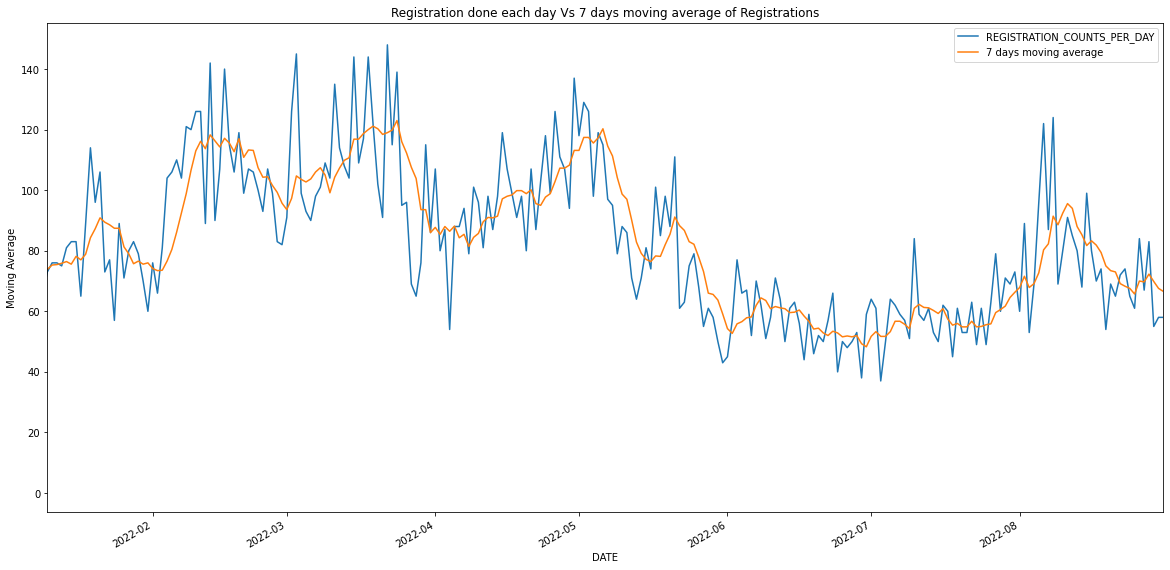

In [52]:
df_reg_count[['REGISTRATION_COUNTS_PER_DAY','7 days moving average']].plot(xlim=['2022-01-10','2022-08-31'],figsize=(20,10))
plt.xlabel('DATE')
plt.ylabel('Moving Average')
plt.title('Registration done each day Vs 7 days moving average of Registrations')
plt.show()

# Thank You